# Homework2
### Jeremy Rodgers

### Problem 1

H0: pa == pb The proportion of success in the population are the same.
significance level is 5% then 1%

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.stats import norm
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

In [2]:
Na = Nb = 1000
a = 500
b = 550
pa = a/Na
pb = b/Nb
phat = (Na*pa)/(Na+Nb) + (Nb*pb)/(Na+Nb)
qhat = 1 - phat
underSqrt = phat*qhat*((1/Na) + (1/Nb))
z = (pa - pb)/ np.sqrt(underSqrt)
p_value = 1 - norm.cdf(z);
print("z-value: ",z)
print("p-value: ",p_value)
p_value

z-value:  -2.238868314198227
p-value:  0.9874177571498408


0.9874177571498408

Conclusion:<br>
There is a 1.3% chance that the proportions are the same. There for with an alpha of 5%, we disprove our null hypothesis that the proportions are the same. With an alpha of 1% we do not disprove our null hypothesis.

## Part 2: Regression of real estate data

### Task 1:

In [3]:
realEstate1 = pd.read_csv('realEstate1.csv')
realEstate2 = pd.read_csv('realEstate2.csv')
re1Count = realEstate1.ListNo.count()
re2Count = realEstate2.ListNo.count()

frames = [realEstate1, realEstate2]
realEstate = pd.concat(frames)
assert(re1Count + re2Count == realEstate.ListNo.count())


### Task 2

In [4]:
realEstate = (realEstate.loc[(realEstate['LstPrice'] > 200000) & (realEstate['LstPrice'] < 1000000)])
realEstate['LstPrice']
realEstate['LstPrice'].describe()


count       260.000000
mean     463537.550000
std      196435.058336
min      205000.000000
25%      312925.000000
50%      414750.000000
75%      589225.000000
max      999900.000000
Name: LstPrice, dtype: float64

In [5]:
realEstate = realEstate[['TotSqf', 'YearBlt','SoldPrice', 'LstPrice','Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'Patio', 'PkgSpacs', 'PropType', 'Taxes', 'TotBed', 'TotBth']]

In [6]:
print(realEstate.dtypes)
print(realEstate.count)

TotSqf        object
YearBlt        int64
SoldPrice      int64
LstPrice       int64
Acres        float64
Deck           int64
GaragCap       int64
Latitude     float64
Longitude    float64
Patio          int64
PkgSpacs       int64
PropType      object
Taxes          int64
TotBed       float64
TotBth       float64
dtype: object
<bound method DataFrame.count of     TotSqf  YearBlt  SoldPrice  LstPrice  Acres  Deck  GaragCap   Latitude  \
0    5,415     1998     752000    725000   0.29     1         3  40.779524   
1      924     1965     205000    205000   0.01     0         0  40.773243   
2    1,702     1940     390000    390000   0.11     0         0  40.773972   
3    1,756     1940     443000    445000   0.14     0         1  40.783009   
5    1,368     1976     334000    339000   0.01     0         2  40.771693   
6    2,956     1950     570000    600000   0.14     1         2  40.783889   
7    1,085     1968     215000    209900   0.01     1         0  40.775431   
9    1,539    

In [7]:
realEstate["TotSqf"] = realEstate['TotSqf'].str.replace(',', '')
realEstate["TotSqf"] = pd.to_numeric(realEstate['TotSqf'])
dummies = pd.get_dummies(realEstate['PropType'])
print(realEstate.describe())
frames = [realEstate, dummies]
realEstate = pd.concat(frames, axis = 1)

            TotSqf      YearBlt      SoldPrice       LstPrice       Acres  \
count   260.000000   260.000000     260.000000     260.000000  260.000000   
mean   2484.534615  1940.211538  450902.884615  463537.550000    0.130538   
std    1208.067289    36.328051  186690.874578  196435.058336    0.123134   
min     844.000000  1852.000000  205000.000000  205000.000000    0.000000   
25%    1551.500000  1908.000000  308375.000000  312925.000000    0.050000   
50%    2263.500000  1937.000000  400000.000000  414750.000000    0.110000   
75%    3030.750000  1976.000000  561625.000000  589225.000000    0.160000   
max    7508.000000  2015.000000  980000.000000  999900.000000    0.690000   

             Deck    GaragCap    Latitude   Longitude       Patio    PkgSpacs  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     0.750000    1.273077   40.620685 -111.445514    0.834615    1.073077   
std      1.240796    0.973811    2.528921    6.938257    3.3794

In [8]:
#taxMax = realEstate['Taxes'].quantile(.995)
#value of quantile hard coded so code can be ran multiple times

realEstate = realEstate.loc[(realEstate['Taxes'] < 72681)]
realEstate = realEstate.loc[realEstate['Longitude'] < -105]
print(realEstate.describe())

            TotSqf      YearBlt      SoldPrice       LstPrice       Acres  \
count   257.000000   257.000000     257.000000     257.000000  257.000000   
mean   2478.875486  1940.490272  450866.692607  463404.525292    0.131051   
std    1212.437753    36.334182  187524.462691  197317.157047    0.123753   
min     844.000000  1852.000000  205000.000000  205000.000000    0.000000   
25%    1550.000000  1908.000000  308000.000000  310000.000000    0.050000   
50%    2224.000000  1937.000000  400000.000000  414500.000000    0.110000   
75%    3017.000000  1976.000000  565000.000000  589000.000000    0.160000   
max    7508.000000  2015.000000  980000.000000  999900.000000    0.690000   

             Deck    GaragCap    Latitude   Longitude       Patio    PkgSpacs  \
count  257.000000  257.000000  257.000000  257.000000  257.000000  257.000000   
mean     0.750973    1.276265   40.777555 -111.875749    0.832685    1.046693   
std      1.246969    0.975051    0.005825    0.013946    3.3979

### Task 3

In [9]:
print(realEstate)

     TotSqf  YearBlt  SoldPrice  LstPrice  Acres  Deck  GaragCap   Latitude  \
0      5415     1998     752000    725000   0.29     1         3  40.779524   
1       924     1965     205000    205000   0.01     0         0  40.773243   
2      1702     1940     390000    390000   0.11     0         0  40.773972   
3      1756     1940     443000    445000   0.14     0         1  40.783009   
5      1368     1976     334000    339000   0.01     0         2  40.771693   
6      2956     1950     570000    600000   0.14     1         2  40.783889   
7      1085     1968     215000    209900   0.01     1         0  40.775431   
9      1539     1916     399000    399900   0.09     0         0  40.775075   
10     2113     1985     445500    450000   0.01     1         1  40.772489   
12     1082     1891     300000    300000   0.07     0         0  40.772800   
13     3387     1986     478250    489900   0.09     0         1  40.781456   
16     1211     1939     360000    359500   0.07    

After being cleaned, the dataset has 257 items/rows and 17 columns. Each column corresponds to relevant information a potential buyer would want to know about the house such as the total square footage, the year the house was built, how many cars can fit in the garage and so on. After running through the data quickly, the appears logical based on what I know about the houses. Total square footage seems logoical with the square footage I typically hear people talk about when they refer to Real Estate. Latitude and Longitude are more precise deicmals as expected. Some of the acre values may be low, 0.01 for example. But mostly the values add up logically.

In [10]:
homeTypeTotals = [realEstate['Single Family'].sum(),
realEstate['Townhouse'].sum(),
realEstate['Condo'].sum()]
homeTypeTotals
names = ["Single Family", "Townhouse","Condo"]

Text(0, 0.5, 'Number of Homes')

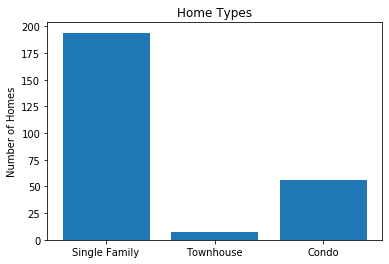

In [11]:
plt.bar(names,homeTypeTotals)
plt.title('Home Types')
plt.ylabel("Number of Homes")

In [12]:
realEstate.corr()

,TotSqf,YearBlt,SoldPrice,LstPrice,Acres,Deck,GaragCap,Latitude,Longitude,Patio,PkgSpacs,Taxes,TotBed,TotBth,Condo,Single Family,Townhouse
TotSqf,1.000000,0.150309,0.856134,0.866691,0.738043,0.173308,0.570661,0.415019,0.275745,-0.017008,0.188713,0.814223,0.723863,0.788167,-0.430044,0.422695,-0.026414
YearBlt,0.150309,1.000000,0.202465,0.207930,0.110440,0.130219,0.470059,0.333459,-0.231580,-0.026131,-0.170480,0.307737,-0.055325,0.310558,0.437067,-0.523346,0.274599
SoldPrice,0.856134,0.202465,1.000000,0.994978,0.709380,0.161274,0.626073,0.374229,0.378518,-0.013058,0.149729,0.873635,0.644520,0.725855,-0.388171,0.383369,-0.028682
LstPrice,0.866691,0.207930,0.994978,1.000000,0.716560,0.165510,0.636116,0.371438,0.375739,-0.017352,0.164530,0.878184,0.649052,0.738358,-0.378992,0.375962,-0.032389
Acres,0.738043,0.110440,0.709380,0.716560,1.000000,0.165732,0.447886,0.568249,0.235933,0.005157,0.178064,0.678446,0.588819,0.504789,-0.524180,0.550447,-0.125289
Deck,0.173308,0.130219,0.161274,0.165510,0.165732,1.000000,0.079294,0.184221,0.019710,0.753466,0.027597,0.119304,0.117856,0.107399,-0.068574,0.067675,-0.004933
GaragCap,0.570661,0.470059,0.626073,0.636116,0.447886,0.079294,1.000000,0.323426,0.079707,-0.048481,-0.026026,0.629634,0.352746,0.597674,-0.062674,0.013056,0.124445
Latitude,0.415019,0.333459,0.374229,0.371438,0.568249,0.184221,0.323426,1.000000,-0.252985,-0.026625,0.169701,0.344140,0.292322,0.299270,-0.359513,0.293326,0.136594
Longitude,0.275745,-0.231580,0.378518,0.375739,0.235933,0.019710,0.079707,-0.252985,1.000000,0.047546,0.044034,0.345215,0.315474,0.141285,-0.281389,0.332640,-0.165435
Patio,-0.017008,-0.026131,-0.013058,-0.017352,0.005157,0.753466,-0.048481,-0.026625,0.047546,1.000000,-0.033298,-0.038108,0.012585,-0.057990,-0.079573,0.078574,-0.005842


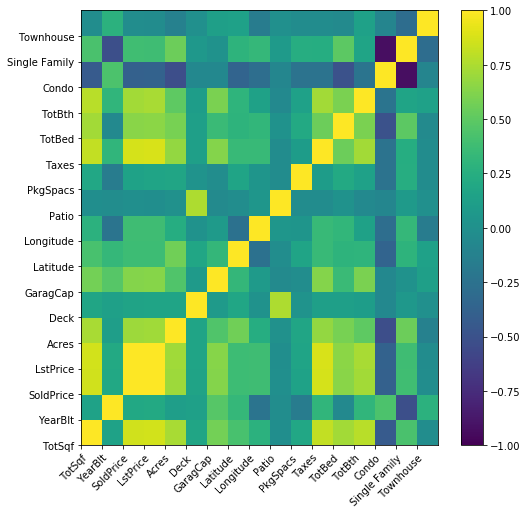

In [13]:
data = realEstate.corr().values
dir(realEstate.corr())
headings = realEstate.corr()
img = plt.pcolor(data, vmin=-1,vmax=1)
ax = plt.gca()          
ax.set_xticks(np.arange(len(headings)))
ax.set_xticklabels(headings)
ax.set_yticks(np.arange(len(headings)))
ax.set_yticklabels(headings)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.gcf().set_size_inches(8,8)
plt.colorbar(img)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d9cfac8>,
      dtype=object)

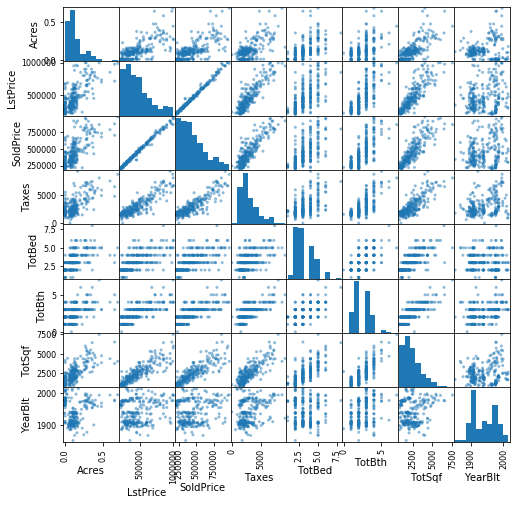

In [14]:
realEstateSubset = realEstate[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
pd.plotting.scatter_matrix(realEstateSubset, figsize=(8,8))

List price has a very strong correlation with soldPrice<br>
List price has a strong correlation with taxes<br>
List price has a moderate correlation with total square feet<br>
Sold price has a strong correlation with taxes<br>
Sold price has a strong correlation with total square feet<br>
Total sqare feet has a mild correlation with acres<br>

## Task 4

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

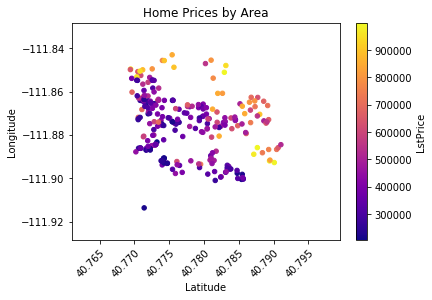

In [15]:
fig, ax = plt.subplots()
realEstate.plot(kind="scatter", x="Latitude", y="Longitude", c="LstPrice", cmap="plasma", ax=ax);
plt.title("Home Prices by Area")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

### findings
It seams that list price increases when the latitude or longitude increase

<table style="width:60%", align="left">

explanatory variable, X dependent variable, Y 
square footage             house price 
advertising dollars         profit 
stress                     lifespan ? ? 
</table>

## Task 5

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     699.9
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.49e-75
Time:                        21:44:08   Log-Likelihood:                -3314.9
No. Observations:                 257   AIC:                             6634.
Df Residuals:                     255   BIC:                             6641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.226e+05   1.38e+04      8.882      0.0

Text(0, 0.5, 'Sold Price')

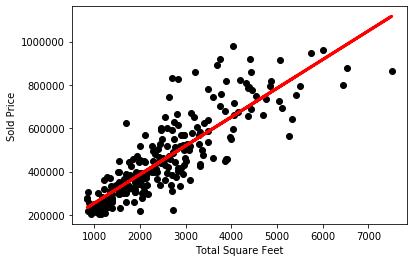

In [16]:
soldP_tsqf_ols = sm.ols(formula = 'SoldPrice ~ TotSqf', data = realEstate).fit()
print(soldP_tsqf_ols.summary())

plt.scatter(x=realEstate['TotSqf'], y=realEstate['SoldPrice'], c="k", marker='o')
plt.plot(realEstate['TotSqf'], soldP_tsqf_ols.predict(), color='red', linewidth=3)
plt.xlabel('Total Square Feet')
plt.ylabel('Sold Price')

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     822.0
Date:                Wed, 29 May 2019   Prob (F-statistic):           9.58e-82
Time:                        21:44:08   Log-Likelihood:                -3299.4
No. Observations:                 257   AIC:                             6603.
Df Residuals:                     255   BIC:                             6610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.531e+05   1.18e+04     12.922      0.0

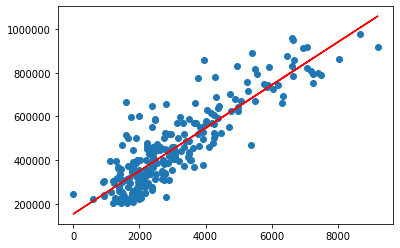

In [17]:
soldP_tax_ols = sm.ols(formula = "SoldPrice ~ Taxes", data = realEstate).fit()
print(soldP_tax_ols.summary())
plt.scatter(realEstate["Taxes"], realEstate["SoldPrice"], marker = "o")
plt.plot(realEstate["Taxes"], soldP_tax_ols.predict(), color="r")

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.520e+04
Date:                Wed, 29 May 2019   Prob (F-statistic):          6.30e-257
Time:                        21:44:09   Log-Likelihood:                -2893.0
No. Observations:                 257   AIC:                             5790.
Df Residuals:                     255   BIC:                             5797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.267e+04   2999.326      4.225      0.0

Text(0, 0.5, 'Sold Price')

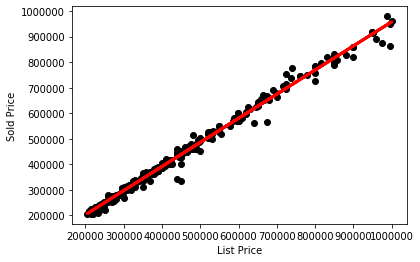

In [18]:
soldP_LstP_ols = sm.ols(formula = 'SoldPrice ~ LstPrice', data = realEstate).fit()
print(soldP_LstP_ols.summary())

plt.scatter(x=realEstate['LstPrice'], y=realEstate['SoldPrice'], c="k", marker='o')
plt.plot(realEstate['LstPrice'], soldP_LstP_ols.predict(), color='red', linewidth=3)
plt.xlabel('List Price')
plt.ylabel('Sold Price')

The r^2 value for SoldPrice ~ ListPrice is 0.99. This means that increases in Sold Price are almost completely explained by increases in list price and that we can predict Sold price based on a given list price fairly accurately.
Beta_1 for is the slope and for this model it is 0.9456. Therefore every \$1 increase in List Price represents a \$0.9456 increase in Sold Price

## Task 6

In [19]:
megaReg = sm.ols(formula= "SoldPrice ~ TotSqf + PropType+ YearBlt + Acres + Deck + Patio + PkgSpacs + TotBed + TotBth+ GaragCap + Longitude + Latitude + Taxes", data = realEstate).fit()
multiReg = sm.ols(formula= "SoldPrice ~ TotSqf + GaragCap + Longitude + Latitude + Taxes", data = realEstate).fit()
multiReg1 = sm.ols(formula= "SoldPrice ~ TotSqf + GaragCap + Longitude + Taxes", data = realEstate).fit()
multiReg2 = sm.ols(formula= "SoldPrice ~ TotSqf + Longitude + Taxes", data = realEstate).fit()
multiReg3 = sm.ols(formula= "SoldPrice ~ TotSqf + Taxes", data = realEstate).fit()

print(megaReg.summary())
print(multiReg3.summary())
print("multiReg1: ", multiReg1.rsquared)
print("multiReg2: ", multiReg2.rsquared)
print("multiReg3: ", multiReg3.rsquared)

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.71
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.82e-91
Time:                        21:44:09   Log-Likelihood:                -3240.0
No. Observations:                 257   AIC:                             6510.
Df Residuals:                     242   BIC:                             6563.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [20]:
print(multiReg3.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     600.6
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.31e-97
Time:                        21:44:09   Log-Likelihood:                -3260.3
No. Observations:                 257   AIC:                             6527.
Df Residuals:                     254   BIC:                             6537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.076e+05   1.13e+04      9.558      0.0

## insights
The best predictors of Sold Price are taxes and Total Square Feet<br>
What is the coefficient for TotSqf measuring? Every 66.45 increase in square footage makes up for a \$1 in Sale Price<br>
When GaragCap is included in the multi-regression, the Beta 1 is 21,300. Therefore, my best estimate of the value of a Garage Space is 21,300.<br>
Latitude and Longitude are both irrelevent as the amount of increase in the coefficient is massive compared to the change in house price. Ex. For latitude an increase of 2,206,000 results in a \$1 increase in sales.<br>
My model predicts 82.5% of the change in Sale Price by using TotSqf and Taxes. List price, can predict 99% of the change.


## Task 7

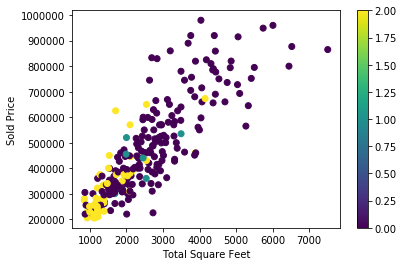

In [21]:

propNum = realEstate['PropType'].map({"Single Family": 0, "Townhouse": 1, "Condo": 2})
img = plt.scatter(realEstate["TotSqf"],realEstate["SoldPrice"], c=propNum, label = propNum)
plt.xlabel('Total Square Feet'); plt.ylabel('Sold Price')
plt.colorbar()

In [24]:
# realEstate["PropType"] = propNum
realEstate

,TotSqf,YearBlt,SoldPrice,LstPrice,Acres,Deck,GaragCap,Latitude,Longitude,Patio,PkgSpacs,PropType,Taxes,TotBed,TotBth,Condo,Single Family,Townhouse
0,5415,1998,752000,725000,0.29,1,3,40.779524,-111.893542,1,0,Single Family,7244,4.0,5.0,0,1,0
1,924,1965,205000,205000,0.01,0,0,40.773243,-111.883291,0,0,Condo,1431,2.0,1.0,1,0,0
2,1702,1940,390000,390000,0.11,0,0,40.773972,-111.867470,1,0,Single Family,1816,3.0,1.0,0,1,0
3,1756,1940,443000,445000,0.14,0,1,40.783009,-111.872100,1,3,Single Family,3260,3.0,2.0,0,1,0
5,1368,1976,334000,339000,0.01,0,2,40.771693,-111.886951,0,2,Condo,2141,3.0,2.0,1,0,0
6,2956,1950,570000,600000,0.14,1,2,40.783889,-111.872194,1,2,Single Family,4197,3.0,3.0,0,1,0
7,1085,1968,215000,209900,0.01,1,0,40.775431,-111.873783,0,1,Condo,1478,2.0,2.0,1,0,0
9,1539,1916,399000,399900,0.09,0,0,40.775075,-111.872260,1,3,Single Family,2207,3.0,2.0,0,1,0
10,2113,1985,445500,450000,0.01,1,1,40.772489,-111.884959,0,0,Condo,2904,2.0,3.0,1,0,0
12,1082,1891,300000,300000,0.07,0,0,40.772800,-111.877568,0,2,Single Family,2077,2.0,1.0,0,1,0


In [43]:
condo_ols = sm.ols(data = realEstate, formula = "SoldPrice ~ Condo").fit()
th_ols = sm.ols(data = realEstate, formula = "SoldPrice ~ Townhouse").fit()
sf = "Single Family"
sf_ols = sm.ols(data = realEstate, formula = "SoldPrice ~ Q(sf)").fit()
condo_ols.summary()
th_ols.summary()
print(sf_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SoldPrice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     43.93
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.01e-10
Time:                        21:56:23   Log-Likelihood:                -3464.1
No. Observations:                 257   AIC:                             6932.
Df Residuals:                     255   BIC:                             6939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.25e+05   2.19e+04     14.863      0.0

In [45]:

sf_ols = sm.ols(data = realEstate, formula = "SoldPrice ~ PropType").fit()
sf_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     23.24
Date:                Wed, 29 May 2019   Prob (F-statistic):           5.40e-10
Time:                        21:57:34   Log-Likelihood:                -3463.0
No. Observations:                 257   AIC:                             6932.
Df Residuals:                     254   BIC:                             6943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.132e+05   2.31e+04     13.542      0.000    2.68e+05    3.59e+05
PropType[T.Single Family]  1.785e+05   2.63e+04      6.799      0.000    1.27e+05     2.3e+05
PropType[T.Townhouse]      1.056e+05   6.94e+04      1.521      0.129   -3.11e+04    2.42e+05
==============================================================================
Omnibus:                       23.662   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.300
Skew:                           0.813   Prob(JB):                     7.16e-07
Kurtosis:                       2.994   Cond. No.                         8.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
realEstateCp = realEstate
realEstateCp["PropType"] = propNum

In [49]:

com_ols = sm.ols(data = realEstateCp, formula = "SoldPrice ~ PropType").fit()
com_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     46.59
Date:                Wed, 29 May 2019   Prob (F-statistic):           6.36e-11
Time:                        22:00:41   Log-Likelihood:                -3463.0
No. Observations:                 257   AIC:                             6930.
Df Residuals:                     255   BIC:                             6937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.92e+05   1.24e+04     39.840      0.000    4.68e+05    5.16e+05
PropType   -8.891e+04    1.3e+04     -6.826      0.000   -1.15e+05   -6.33e+04
==============================================================================
Omnibus:                       23.444   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.995
Skew:                           0.808   Prob(JB):                     8.34e-07
Kurtosis:                       2.986   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
ols_w_sft = sm.ols(data = realEstateCp, formula = "SoldPrice ~ PropType + TotSqf").fit()
ols_w_sft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     349.6
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.15e-73
Time:                        22:02:20   Log-Likelihood:                -3314.6
No. Observations:                 257   AIC:                             6635.
Df Residuals:                     254   BIC:                             6646.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.297e+05   1.69e+04      7.667      0.000    9.64e+04    1.63e+05
PropType   -5897.3417   8135.217     -0.725      0.469   -2.19e+04    1.01e+04
TotSqf       130.6645      5.562     23.493      0.000     119.711     141.618
==============================================================================
Omnibus:                       39.135   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.540
Skew:                           0.809   Prob(JB):                     1.77e-16
Kurtosis:                       5.039   Cond. No.                     8.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## findings
Single Family homes are larger than condos and town homes. Once we include square feet, the model realizes that square footage explains relationship and not the property type. As a result, we see our p-value rise!